In [1]:
import DMN3 as DMN
from matplotlib import pyplot as plt
import numpy as np
from DMN_funcs import *
import pandas as pd


In [2]:

def elasticity_matrix(E, nu):
    # plane strain elasticity matrix
    Ce = np.array([[1 - nu, nu, 0], [nu, 1 - nu, 0], [0, 0, (1 - 2 * nu)/2 ]])
    Ce *= E / ((1 - 2 * nu) * (1 + nu))

    return Ce

In [3]:
# node = DMN.Node(np.ones(6)*2)
# node.compliance
# node.rotated_compliance = node.compliance
# p1 = np.array([0.7243458035427647,-0.6624489424587073,0.0,0.7243458035427647,0.0,2.7735894920029462])
# p2 = np.array([0.36757546481294456,-0.16233746963686535,0.0,0.3675754648129446,0.0,1.05982586889962])

data = pd.read_csv("data/optimised2_data.csv",header=None)
data = data.to_numpy()
# data[0]

which = 123
# p1 = data[which][0:6]
# p2 = data[which][6:12]
# p3 = data[which][12:18]

p2 = convert_matrix(np.linalg.inv(elasticity_matrix(10*10**9,0.3)))*(10**9)
p1 = convert_matrix(np.linalg.inv(elasticity_matrix(100*10**9,0.3)))*(10**9)
# print(p1, p2)
# node.left = DMN.Node(p1)
# node.right = DMN.Node(p2)

# node.right.rotated_compliance = node.right.compliance
# node.left.rotated_compliance = node.left.compliance

# node.rotated_compliance = homogenise(node.left.rotated_compliance, node.right.rotated_compliance,0.2,0.8)

In [4]:
loading_path = np.linspace(0,0.03,150)
Model = DMN.Tree(5)

metadata,training_error,validation_error,root = load_model('models/model_N=5.pkl')

# root = Model.initialise(num_loading_steps=len(loading_path))

Model.propagate_weights(root)
Model.initialise_bottom_layer(root,p1,p2)
# print(loading_path)
Model.FeedForward(root,p1,p2)
Model.plasticity_loader(root,loading_path)



Convergence achieved in  3  iterations for loading index:  10
Convergence achieved in  1  iterations for loading index:  20
Convergence achieved in  4  iterations for loading index:  30
Convergence achieved in  4  iterations for loading index:  40
Convergence achieved in  6  iterations for loading index:  50
Convergence achieved in  4  iterations for loading index:  60
Convergence achieved in  4  iterations for loading index:  70
Convergence achieved in  6  iterations for loading index:  80
Convergence achieved in  7  iterations for loading index:  90
Convergence achieved in  6  iterations for loading index:  100
Convergence achieved in  4  iterations for loading index:  110
Convergence achieved in  6  iterations for loading index:  120
Convergence achieved in  6  iterations for loading index:  130
Convergence achieved in  4  iterations for loading index:  140


In [5]:
# Model.FeedForward(root,p1,p2)
print((convert_vectorised(root.rotated_compliance)))
print('original',convert_vectorised(p1))
final_stress= np.linalg.inv(convert_vectorised(root.rotated_compliance)) @ root.epss[-1]

print("Final stress:",final_stress)



[[ 0.10907208 -0.00041149 -0.00364564]
 [-0.00041149  0.14086409  0.0083935 ]
 [-0.00364564  0.0083935   0.15487383]]
original [[ 0.0091 -0.0039  0.    ]
 [-0.0039  0.0091  0.    ]
 [ 0.      0.      0.026 ]]
Final stress: [0.27526488 0.00041937 0.00645685]


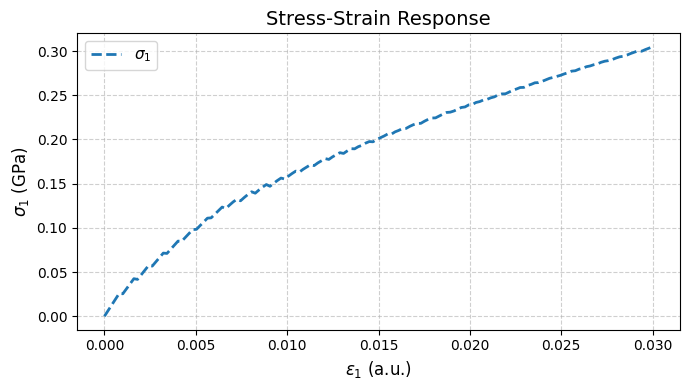

In [9]:
bottom_node = Model.fetch_node(root,3,31)

R = 150
L = 0


plt.figure(figsize=(7, 4))
plt.plot(root.epss[L:R, 0], root.sigmas[L:R, 0], label=r'$\sigma_1$', linestyle='--', color='tab:blue', linewidth=2)
plt.xlabel(r'$\epsilon_1$ (a.u.)', fontsize=12)
plt.ylabel(r'$\sigma_1$ (GPa)', fontsize=12)
plt.title("Stress-Strain Response", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


In [ ]:
bottom_node = Model.fetch_node(root,3,6)

root.delta_sigma,root.res_strain


(array([ 1.63320693e-03, -2.35502085e-04,  6.01443187e-06]),
 array([2.31300323e-05, 3.37953583e-05, 6.99929517e-06]))

In [ ]:
for i in range(1,9):
    bottom_node = Model.fetch_node(root,5,i)
    print(bottom_node.eff_plas_strain)
   

0.00014756731828665293
0.00012301771548461343
0.0004458345172490763
0.00021996718816982133
0.00021148636500733256
0.00015806399144973035
0.0001292689235748006
6.841747572950267e-05
